# SciPy: Biblioteca de Computación Científica en Python

## Introducción

SciPy (Scientific Python) es una biblioteca de Python fundamental para la computación científica y técnica. Construida sobre NumPy, SciPy extiende las capacidades de Python para abordar una amplia gama de problemas científicos y de ingeniería.

## Contexto en el Ecosistema Científico de Python

SciPy forma parte de un ecosistema más amplio de bibliotecas científicas en Python:

- **NumPy**: Base para SciPy, proporciona estructuras de datos para matrices eficientes.
- **Matplotlib**: Biblioteca para la visualización de datos.
- **Pandas**: Herramienta para la manipulación y análisis de datos estructurados.
- **SymPy**: Biblioteca para matemáticas simbólicas.
- **Scikit-learn**: Biblioteca para aprendizaje automático.

## Características Principales de SciPy

### 1. Optimización
- Algoritmos para encontrar mínimos y máximos de funciones.
- Resolución de problemas de programación lineal y no lineal.
- Métodos como BFGS, Nelder-Mead, y optimización global.

In [1]:
from scipy import optimize
import numpy as np

# Ejemplo: Encontrar el mínimo de una función
def f(x):
    return x**2 + 10*np.sin(x)

result = optimize.minimize(f, x0=0)
print(f"Mínimo encontrado en x = {result.x[0]}")

Mínimo encontrado en x = -1.3064401160169776


### 2. Integración Numérica
- Métodos para integración numérica de funciones.
- Solución de ecuaciones diferenciales ordinarias (EDOs).


In [2]:
from scipy import integrate

# Ejemplo: Integración numérica
result, error = integrate.quad(lambda x: np.exp(-x**2), -np.inf, np.inf)
print(f"Integral de exp(-x^2) de -inf a inf: {result}")

Integral de exp(-x^2) de -inf a inf: 1.7724538509055159


### 3. Interpolación
- Interpolación lineal, spline, y polinómica.
- Ajuste de curvas a conjuntos de datos.

In [3]:
from scipy import interpolate

# Ejemplo: Interpolación
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interpolate.interp1d(x, y, kind='cubic')

### 4. Álgebra Lineal
- Resolución de sistemas de ecuaciones lineales.
- Cálculo de autovalores y autovectores.
- Descomposiciones matriciales (LU, Cholesky, SVD).

In [4]:
from scipy import linalg

# Ejemplo: Resolver sistema de ecuaciones lineales
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
x = linalg.solve(A, b)
print(f"Solución: {x}")

Solución: [-4.   4.5]


### 5. Estadísticas y Probabilidad
- Amplia gama de distribuciones de probabilidad.
- Funciones estadísticas para pruebas de hipótesis, regresión, etc.

Estadístico t: -4.754695943505297
Valor p: 3.819135262679201e-06
Rechazamos la hipótesis nula.
Hay una diferencia estadísticamente significativa entre los grupos.


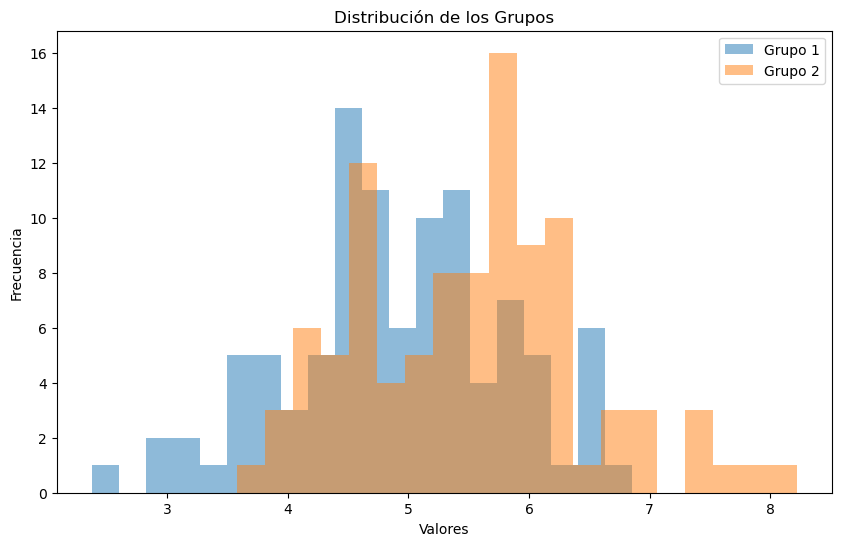


Estadísticas Descriptivas:
Grupo 1 - Media: 4.90, Desviación Estándar: 0.90
Grupo 2 - Media: 5.52, Desviación Estándar: 0.95


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generar datos para dos grupos
np.random.seed(42)  # Para reproducibilidad

# Grupo 1: distribución normal con media 5 y desviación estándar 1
grupo1 = np.random.normal(loc=5, scale=1, size=100)

# Grupo 2: distribución normal con media 5.5 y desviación estándar 1
grupo2 = np.random.normal(loc=5.5, scale=1, size=100)

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(grupo1, grupo2)

print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Hay una diferencia estadísticamente significativa entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar una diferencia significativa entre los grupos.")

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.hist(grupo1, bins=20, alpha=0.5, label='Grupo 1')
plt.hist(grupo2, bins=20, alpha=0.5, label='Grupo 2')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Grupos')
plt.legend()
plt.show()

# Calcular y mostrar estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(f"Grupo 1 - Media: {np.mean(grupo1):.2f}, Desviación Estándar: {np.std(grupo1):.2f}")
print(f"Grupo 2 - Media: {np.mean(grupo2):.2f}, Desviación Estándar: {np.std(grupo2):.2f}")

### 6. Transformadas de Fourier
- Implementación eficiente de la Transformada Rápida de Fourier (FFT).
- Útil para análisis de señales y procesamiento de imágenes.

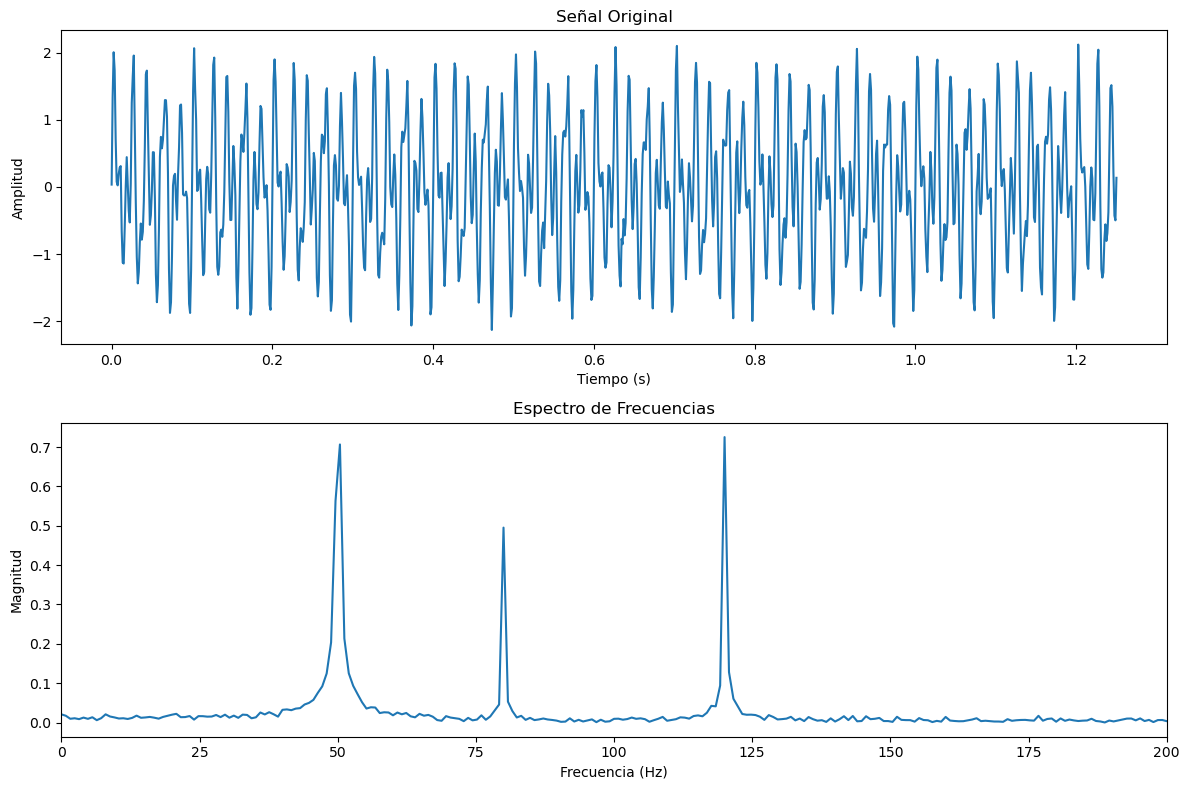

Frecuencias principales detectadas (Hz):
49.60
50.40
120.00


In [6]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# Parámetros de la señal
N = 1000  # Número de puntos de muestra
T = 1.0 / 800.0  # Intervalo de muestreo
t = np.linspace(0.0, N*T, N)  # Array de tiempo

# Generar una señal compuesta
freq1, freq2, freq3 = 50, 80, 120  # Frecuencias en Hz
signal = np.sin(2*np.pi*freq1*t) + 0.5*np.sin(2*np.pi*freq2*t) + 0.75*np.sin(2*np.pi*freq3*t)

# Añadir un poco de ruido a la señal
signal += np.random.normal(0, 0.1, N)

# Aplicar la Transformada Rápida de Fourier
sig_fft = fft(signal)

# Calcular la magnitud del espectro de frecuencias
magnitude = np.abs(sig_fft)

# Calcular las frecuencias correspondientes
freq = np.fft.fftfreq(N, T)[:N//2]

# Visualización
plt.figure(figsize=(12, 8))

# Gráfico de la señal original
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico del espectro de frecuencias
plt.subplot(2, 1, 2)
plt.plot(freq, 2.0/N * magnitude[:N//2])
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 200)  # Limitamos el eje x para mejor visualización

plt.tight_layout()
plt.show()

# Identificar las frecuencias principales
top_frequencies = freq[np.argsort(magnitude[:N//2])[-3:]]
print("Frecuencias principales detectadas (Hz):")
for f in sorted(top_frequencies):
    print(f"{f:.2f}")

### 7. Procesamiento de Señales
- Diseño de filtros digitales.
- Análisis de señales en el dominio del tiempo y la frecuencia.


In [7]:
from scipy import signal

# Ejemplo: Filtro paso bajo
b, a = signal.butter(4, 100, 'low', fs=1000)
y = signal.lfilter(b, a, x)
y

array([-0.01929737, -0.10120533])

### 8. Procesamiento de Imágenes
- Funciones básicas para manipulación y análisis de imágenes.
- Complementa bibliotecas más especializadas como scikit-image.

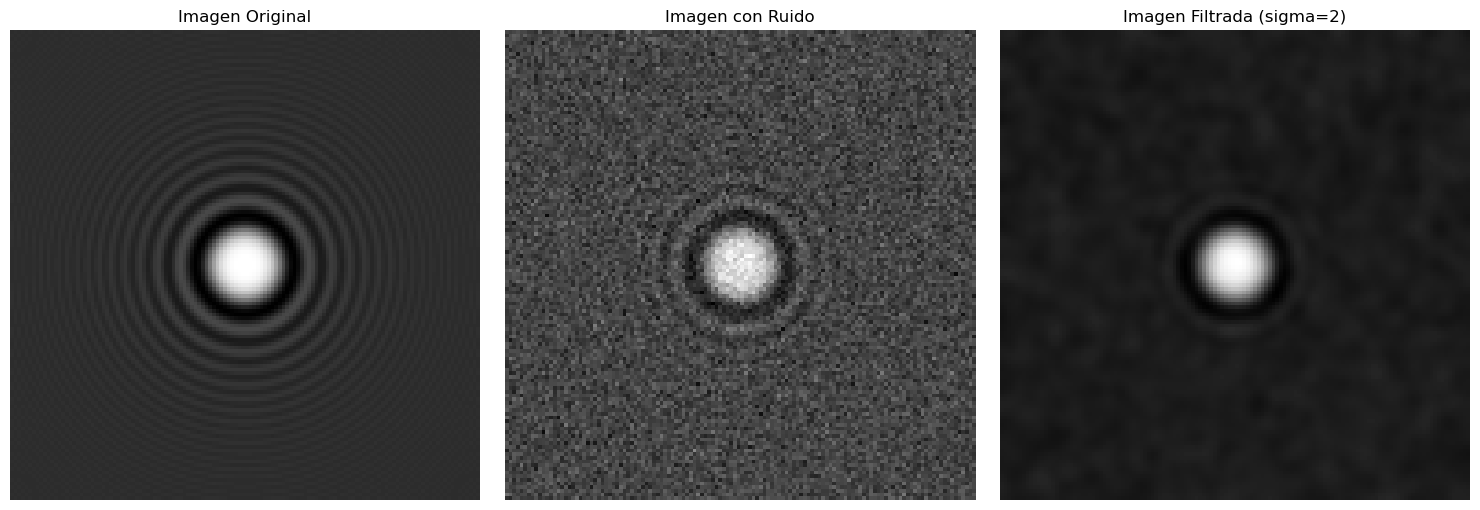

MSE entre la imagen original y la ruidosa: 0.010069
MSE entre la imagen original y la filtrada: 0.001000


In [8]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Crear una imagen sintética simple
def create_image(size=128):
    x = np.linspace(-10, 10, size)
    y = np.linspace(-10, 10, size)
    x, y = np.meshgrid(x, y)
    image = np.sin(x**2 + y**2) / (x**2 + y**2)
    return image

# Generar la imagen
image = create_image()

# Añadir ruido a la imagen
noisy_image = image + np.random.normal(0, 0.1, image.shape)

# Aplicar filtro gaussiano a la imagen ruidosa
sigma = 2  # Parámetro de suavizado
filtered_image = ndimage.gaussian_filter(noisy_image, sigma=sigma)

# Visualización
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen Original')
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title('Imagen con Ruido')
axs[1].axis('off')

axs[2].imshow(filtered_image, cmap='gray')
axs[2].set_title(f'Imagen Filtrada (sigma={sigma})')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Calcular y mostrar el error cuadrático medio (MSE)
mse_noisy = np.mean((image - noisy_image)**2)
mse_filtered = np.mean((image - filtered_image)**2)

print(f"MSE entre la imagen original y la ruidosa: {mse_noisy:.6f}")
print(f"MSE entre la imagen original y la filtrada: {mse_filtered:.6f}")

## Conclusión

SciPy es una herramienta indispensable para científicos, ingenieros y analistas de datos que trabajan con Python. Su amplia gama de funcionalidades, combinada con su integración con otras bibliotecas del ecosistema científico de Python, la convierte en un recurso invaluable para la computación científica y técnica.
